## Multi-label prediction with Planet Amazon dataset

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

## Getting the data

The planet dataset isn't available on the [fastai dataset page](https://course.fast.ai/datasets) due to copyright restrictions. You can download it from Kaggle however. Let's see how to do this by using the [Kaggle API](https://github.com/Kaggle/kaggle-api) as it's going to be pretty useful to you if you want to join a competition or use other Kaggle datasets later on.

First, install the Kaggle API by uncommenting the following line and executing it, or by executing it in your terminal (depending on your platform you may need to modify this slightly to either add `source activate fastai` or similar, or prefix `pip` with a path. Have a look at how `conda install` is called for your platform in the appropriate *Returning to work* section of https://course.fast.ai/. (Depending on your environment, you may also need to append "--user" to the command.)

planet 데이터셋은 저작권 때문에 fastai 데이터셋 페이지에 존재하지 않고, Kaggle에서 다운로드받을 수 있습니다.
<br> 데이터를 다운로드 받기 위해 Kaggle API를 사용하는 방법을 알아보겠습니다. (추후에 competition에 참가하거나 다른 Kaggle 데이터셋을 활용하고 싶다면 이 내용이 유용할 겁니다.)

먼저, Kaggle API를 설치해야 합니다. 아래 줄을 주석해제하고 실행하거나, 터미널에서 실행하세요. 아나콘다를 사용한다면 `conda install` 로 설치하면 됩니다.

In [ ]:
# ! pip install kaggle --upgrade

Then you need to upload your credentials from Kaggle on your instance. Login to kaggle and click on your profile picture on the top left corner, then 'My account'. Scroll down until you find a button named 'Create New API Token' and click on it. This will trigger the download of a file named 'kaggle.json'.

Upload this file to the directory this notebook is running in, by clicking "Upload" on your main Jupyter page, then uncomment and execute the next two commands (or run them in a terminal). For Windows, uncomment the last two commands.

그러고나서 Kaggle 인증서를 여러분의 환경에 업로드해야 합니다. 
Kaggle에 로그인하고 우상단의 프로필 이미지를 클릭하고, 'My account' 로 들어갑니다.
<br>'Create New API Token' 버튼이 보일때까지 스크롤을 내리고 버튼을 클릭하세요. 그러면 'kaggle.json' 이라는 파일을 다운로드 받을 것입니다.

이 파일을 이 notebook이 있는 디렉토리에 업로드하세요. Jupyter화면에서 'Upload' 버튼을 클릭하여 파일을 찾으면 됩니다.
그러고 나서 아래 두가지 명령을 주석해제하고 실행하세요.

In [3]:
# ! mkdir -p ~/.kaggle/
# ! mv kaggle.json ~/.kaggle/

# For Windows, uncomment these two commands
# ! mkdir %userprofile%\.kaggle
# ! move kaggle.json %userprofile%\.kaggle

You're all set to download the data from [planet competition](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space). You **first need to go to its main page and accept its rules**, and run the two cells below (uncomment the shell commands to download and unzip the data). If you get a `403 forbidden` error it means you haven't accepted the competition rules yet (you have to go to the competition page, click on *Rules* tab, and then scroll to the bottom to find the *accept* button).

[planet competition](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space)에서 데이터를 다운로드 받습니다.
먼저 메인 페이지로 가서 rule를 동의하고, 아래 두 셀들을 실행합니다. (셀의 커맨드들을 주석해제하여 데이터 다운로드 및 압축해제 하세요.)
<br> 만약 `403 forbidden` 에러가 발생하면 해당 competition의 rule을 아직 동의하지 않았다는 뜻입니다. (competition 페이지로 가서 *Rules* 탭으로 이동하고 제일 밑으로 스크롤하여 '동의' 버튼을 찾으세요.)

In [3]:
# path = Config.data_path()/'planet'
path = Path('data/planet')
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('data/planet')

In [6]:
# !chmod 600 /home/fastai/.kaggle/kaggle.json

In [9]:
# ! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
# ! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}  
# ! unzip -q -n {path}/train_v2.csv.zip -d {path}

 99%|███████████████████████████████████████▌| 593M/600M [00:17<00:00, 15.0MB/s]
100%|████████████████████████████████████████| 600M/600M [00:17<00:00, 35.0MB/s]
  0%|                                                | 0.00/159k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 159k/159k [00:00<00:00, 1.64MB/s]


To extract the content of this file, we'll need 7zip, so uncomment the following line if you need to install it (or run `sudo apt install p7zip-full` in your terminal).

파일 압축해제를 위해 7zip 이 필요할 겁니다, 그래서 만약 설치가 필요하다면 아래 라인을 압축해제하고 실행하세요. (혹은 터미널에서 `sudo apt install p7zip-full` 를 실행하세요.)

In [ ]:
# ! conda install -y -c haasad eidl7zip

And now we can unpack the data (uncomment to run - this might take a few minutes to complete).

이제 데이터를 압축해제할 수 있습니다. (아래 라인을 압축해제 하고 실행하세요. 완료에 몇 분이 걸릴 수 있습니다.)

In [10]:
# ! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path.as_posix()}


7-Zip (A) [64] 9.20  Copyright (c) 1999-2010 Igor Pavlov  2010-11-18
p7zip Version 9.20 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,80 CPUs)

Processing archive: data/planet/train-jpg.tar.7z

Extracting  train-jpg.tar

Everything is Ok

Size:       665753600
Compressed: 629296207


## Multiclassification

Contrary to the pets dataset studied in last lesson, here each picture can have multiple labels. If we take a look at the csv file containing the labels (in 'train_v2.csv' here) we see that each 'image_name' is associated to several tags separated by spaces.

애완동물 데이터 세트와 달리, 여기에서는 각 사진에 여러 개의 라벨이 있을 수 있습니다.<br>
라벨이 들어 있는 csv 파일을 살펴보면(여기 'train_v2.csv'에서) 각 'image_name'은 공백으로 구분된 여러 태그와 연관되어 있음을 알 수 있습니다.

In [4]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

[data block API](https://docs.fast.ai/data_block.html) 사용하면서 이 정보를 `DataBunch`에 넣으려면, 우리는 `ImageList`(`ImageDataBunch`가 아님) 를 사용해야 합니다.<br>
이렇게 하면 생성된 모델이 다중 클래스를 처리할 수 있는 적절한 loss function을 가지고 있는지 확인할 수 있습니다.

In [5]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

We use parentheses around the data block pipeline below, so that we can use a multiline statement without needing to add '\\'.

우리는 아래의 데이터 블록 파이프라인 주위에 괄호를 사용하므로 '\\'를 추가하지 않고도 멀티라인 문장을 사용할 수 있습니다.

In [6]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [7]:
data = (src.transform(tfms, size=128)
        .databunch(bs=4).normalize(imagenet_stats))

`show_batch` still works, and show us the different labels separated by `;`.

`show_batch`는 다른 라벨들을 `;`로 구분하여 보여줍니다.

In [8]:
torch.cuda.set_device(6)

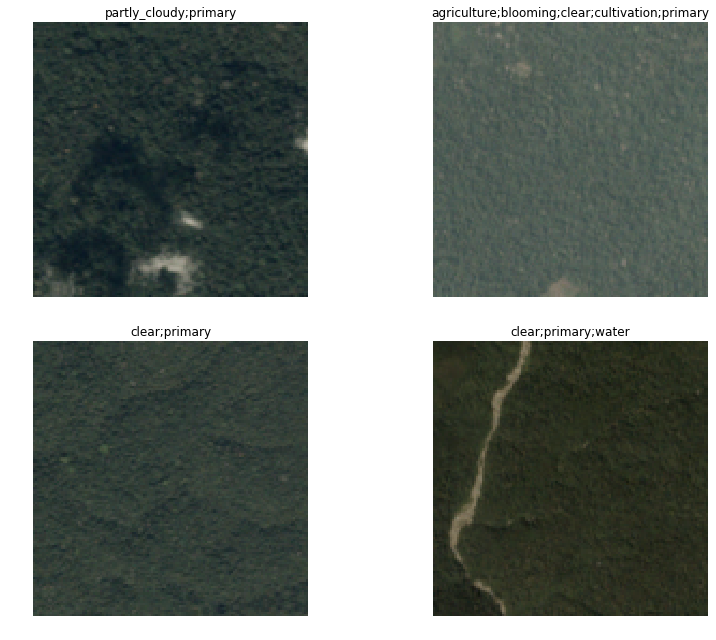

In [9]:
data.show_batch(rows=3, figsize=(12,9))

To create a `Learner` we use the same function as in lesson 1. Our base architecture is resnet34 again, but the metrics are a little bit differeent: we use `accuracy_thresh` instead of `accuracy`. In lesson 1, we determined the predicition for a given class by picking the final activation that was the biggest, but here, each activation can be 0. or 1. `accuracy_thresh` selects the ones that are above a certain threshold (0.5 by default) and compares them to the ground truth.

As for Fbeta, it's the metric that was used by Kaggle on this competition. See [here](https://en.wikipedia.org/wiki/F1_score) for more details.

`Learner` 를 만드는 것은 앞서 애완동물 분류기를 만들때와 동일한 function을 사용합니다. 우리의 베이스 아키텍처는 다시 resnet34이지만, 지표가 조금 다릅니다: 우리는 `accuracy` 대신에 `arruacy_thresh` 를 사용할 겁니다. 전에는 가장 큰 최종 활성화(activation)를 선택하여 주어진 클래스를 결과로 결정했지만, 여기서는 각 활성화가 0 또는 1이 될 수 있습니다. `accuracy_thresh`는 특정 임계값(0.5 기본값)을 초과하는 활성값을 선택하여 ground truth와 비교합니다.


Fbeta에 대해서는, 이번 대회에서 Kaggle이 사용했던 지표입니다. 자세한 내용은 [here](https://en.wikipedia.org/wiki/F1_score)을 참조하세요.

In [10]:
arch = models.resnet34

In [11]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

We use the LR Finder to pick a good learning rate.

좋은 learning rate를 얻기 위해 LR Finder를 사용합니다.

In [12]:
learn.lr_find()

RuntimeError: CUDA error: out of memory

In [ ]:
learn.recorder.plot()

Then we can fit the head of our network.

In [ ]:
lr = 0.01

In [ ]:
learn.fit_one_cycle(5, slice(lr))

In [ ]:
learn.save('stage-1-rn50')

...And fine-tune the whole model:

그리고 모델 전체를 fine-tune 합니다.

In [ ]:
learn.unfreeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


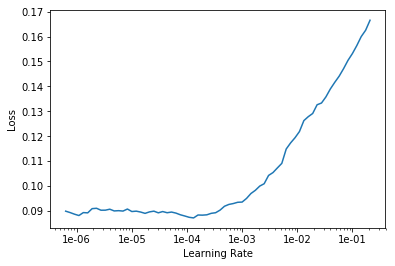

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

In [ ]:
learn.save('stage-2-rn50')

In [ ]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [ ]:
learn.freeze()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


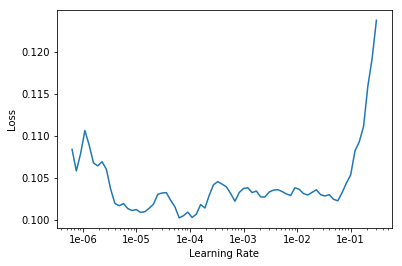

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr=1e-2/2

In [ ]:
learn.fit_one_cycle(5, slice(lr))

In [ ]:
learn.save('stage-1-256-rn50')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

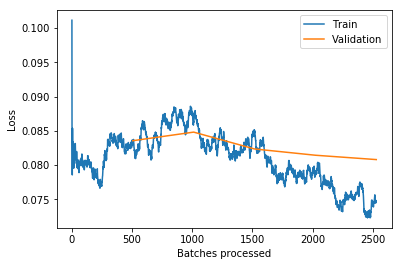

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('stage-2-256-rn50')

You won't really know how you're going until you submit to Kaggle, since the leaderboard isn't using the same subset as we have for training. But as a guide, 50th place (out of 938 teams) on the private leaderboard was a score of `0.930`.

리더보드는 우리가 학습할 때와 같은 데이터셋을 사용하고 있지 않기 때문에 카글에 제출하기 전에 최종 결과를 알 수 없습니다. 그러나 가이드로서 개인 리더보드에서는 50위(938팀 중)가 0.930점이었습니다.

In [ ]:
learn.export()

## fin

(This section will be covered in part 2 - please don't ask about it just yet! :) )

In [ ]:
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z -p {path}  
#! 7za -bd -y -so x {path}/test-jpg.tar.7z | tar xf - -C {path}
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z -p {path}  
#! 7za -bd -y -so x {path}/test-jpg-additional.tar.7z | tar xf - -C {path}

In [ ]:
test = ImageList.from_folder(path/'test-jpg').add(ImageList.from_folder(path/'test-jpg-additional'))
len(test)

61191

In [ ]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [ ]:
labelled_preds[:5]

['agriculture cultivation partly_cloudy primary road',
 'clear haze primary water',
 'agriculture clear cultivation primary',
 'clear primary',
 'partly_cloudy primary']

In [ ]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [ ]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [ ]:
df.to_csv(path/'submission.csv', index=False)

In [ ]:
! kaggle competitions submit planet-understanding-the-amazon-from-space -f {path/'submission.csv'} -m "My submission"

100%|██████████████████████████████████████| 2.18M/2.18M [00:02<00:00, 1.05MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

Private Leaderboard score: 0.9296 (around 80th)